树状图（或树形图）是一种网络结构。它由一个根节点组成，根节点产生由边或分支连接的多个节点。层次结构的最后一个节点称为叶。本文主要基于R语言实现树形图的绘制。关于python实现树形图的绘制见：[基于matplotlib实现树形图的绘制](https://blog.csdn.net/luohenyj/article/details/97949476)

之所以还用R语言实现树形图的绘制，主要原因在于R语言所实现的树形图比python实现的更加多样。R语言树形图提供以下两种类型：
1. 分层树形图：类似CEO管理团队领导管理员工等等。
2. 聚类树形图：聚类将一组个体按相似性分组。它的结果可以可视化为一棵树。

本文主要参考：[Dendrogram](https://www.r-graph-gallery.com/dendrogram.html)

本文所有代码见：[R-Study-Notes](https://github.com/luohenyueji/R-Study-Notes/tree/master/Visualization)

# 1 分层树形图 DENDROGRAM FROM HIERARCHICAL DATA


## 1.1 基于R语言和ggraph绘制树形图 Introduction to tree diagram with R and ggraph

本节逐步介绍通过R语言和ggraph建立树形图，并提供了解释和可复制代码。ggraph包是用R从层次数据构建树形图的最佳选择，其遵循与ggplot2相同的逻辑。本节旨在使用ggraph库制作一个表示层次数据的基本树形图。考虑两种输入格式：
+ 基于边列表
+ 基于嵌套数据

### 1.1.1 通过边绘制树形图 Dendrogram from edge list
基于边列表绘制树形图意思是给定每一个节点到另外一个节点的数据，来依次绘制树形图。边列表数据使用ggraph最方便的格式。数据结构如下图所示。每一行代表一条边，比如(origin,group1)表示从节点origin到group的边。

![](imgonline/Hierarchical_network_2col.png)

请遵循以下步骤：
+ 使用igraph库中的graph_from_data_frame()函数将输入数据帧转换为图形对象
+ 使用ggraph的树形图布局，布局为'dendrogram'

主要步骤依次讲解：

**创建数据**  
其中d1为根节点到第一层节点的数据，每一行代表一条边，比如(origin,group1)表示从节点origin到group的边，d2是第一层节点到第二层节点的数据。edges是对d1和d2的汇总

In [36]:
# libraries
# 包
library(ggraph)
library(igraph)
library(tidyverse)
 
# create an edge list data frame giving the hierarchical structure of your individuals
# 创建层级数据
d1 <- data.frame(from="origin", to=paste("group", seq(1,3), sep=""))
d1
d2 <- data.frame(from=rep(d1$to, each=3), to=paste("subgroup", seq(1,9), sep="_"))
d2
# 汇总
edges <- rbind(d1, d2)
edges

from,to
<fct>,<fct>
origin,group1
origin,group2
origin,group3


from,to
<fct>,<fct>
group1,subgroup_1
group1,subgroup_2
group1,subgroup_3
group2,subgroup_4
group2,subgroup_5
group2,subgroup_6
group3,subgroup_7
group3,subgroup_8
group3,subgroup_9


from,to
<fct>,<fct>
origin,group1
origin,group2
origin,group3
group1,subgroup_1
group1,subgroup_2
group1,subgroup_3
group2,subgroup_4
group2,subgroup_5
group2,subgroup_6


**创建图形结构**

需要创建专用的图形结构，origin->group1表示从节点origin到节点group1

In [37]:
# Create a graph object 
mygraph <- graph_from_data_frame( edges )
mygraph

IGRAPH 2c80675 DN-- 13 12 -- 
+ attr: name (v/c)
+ edges from 2c80675 (vertex names):
 [1] origin->group1     origin->group2     origin->group3     group1->subgroup_1
 [5] group1->subgroup_2 group1->subgroup_3 group2->subgroup_4 group2->subgroup_5
 [9] group2->subgroup_6 group3->subgroup_7 group3->subgroup_8 group3->subgroup_9

**绘图**

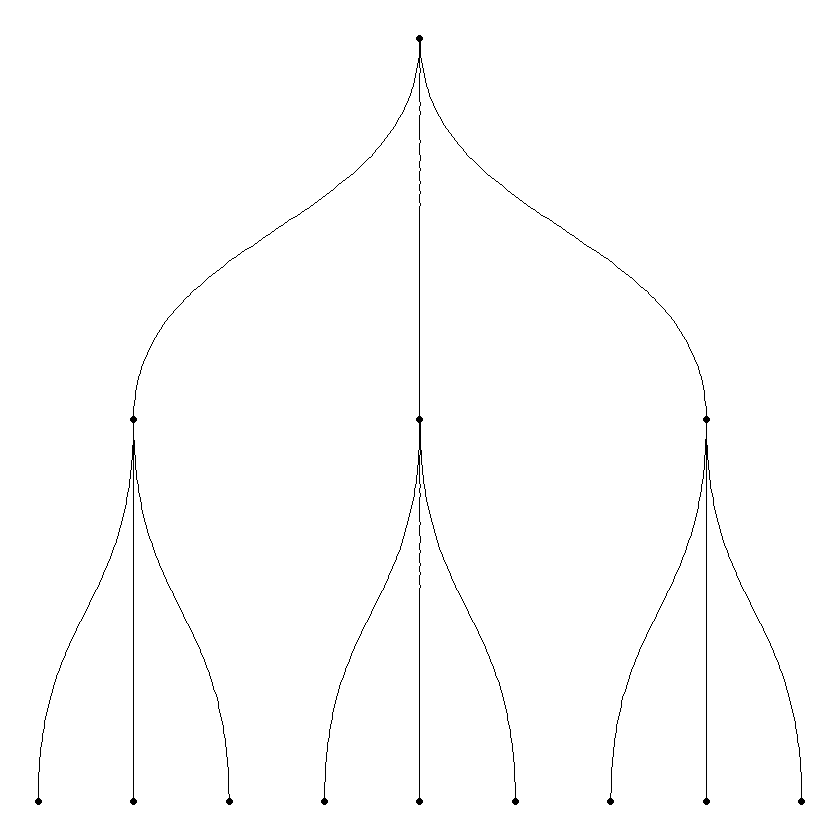

In [38]:
# Basic tree
# 基础树形图
# layout表示布局方式，circular表示是否为环状树形图
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
    # 画边
    geom_edge_diagonal() +
    # 画节点
    geom_node_point() +
    # 设置主题
    theme_void()

### 1.1.2 通过嵌套数据绘制树形图 Dendrogram from a nested dataframe
另一种常见格式是嵌套数据。下面的代码演示如何轻松地将数组转换为嵌套数据。嵌套数据结构如下图所示，嵌套数据每一列代表一个节点，行代表节点到节点的路径

![](imgonline/Nested_DataFrame.png)


**建立数据**

In [39]:
# libraries
library(ggraph)
library(igraph)
library(tidyverse)
 
# create a data frame 
data <- data.frame(
  level1="CEO",
  level2=c( rep("boss1",4), rep("boss2",4)),
  level3=paste0("mister_", letters[1:8])
)
data

level1,level2,level3
<fct>,<fct>,<fct>
CEO,boss1,mister_a
CEO,boss1,mister_b
CEO,boss1,mister_c
CEO,boss1,mister_d
CEO,boss2,mister_e
CEO,boss2,mister_f
CEO,boss2,mister_g
CEO,boss2,mister_h


**将数据转换为边列表**

In [40]:
# transform it to a edge list!
edges_level1_2 <- data %>% select(level1, level2) %>% unique %>% rename(from=level1, to=level2)
edges_level2_3 <- data %>% select(level2, level3) %>% unique %>% rename(from=level2, to=level3)
edges_level1_2
edges_level2_3
edge_list=rbind(edges_level1_2, edges_level2_3)
edge_list

,from,to
,<fct>,<fct>
1,CEO,boss1
5,CEO,boss2


from,to
<fct>,<fct>
boss1,mister_a
boss1,mister_b
boss1,mister_c
boss1,mister_d
boss2,mister_e
boss2,mister_f
boss2,mister_g
boss2,mister_h


,from,to
,<fct>,<fct>
1,CEO,boss1
5,CEO,boss2
11,boss1,mister_a
2,boss1,mister_b
3,boss1,mister_c
4,boss1,mister_d
51,boss2,mister_e
6,boss2,mister_f
7,boss2,mister_g


**绘图**

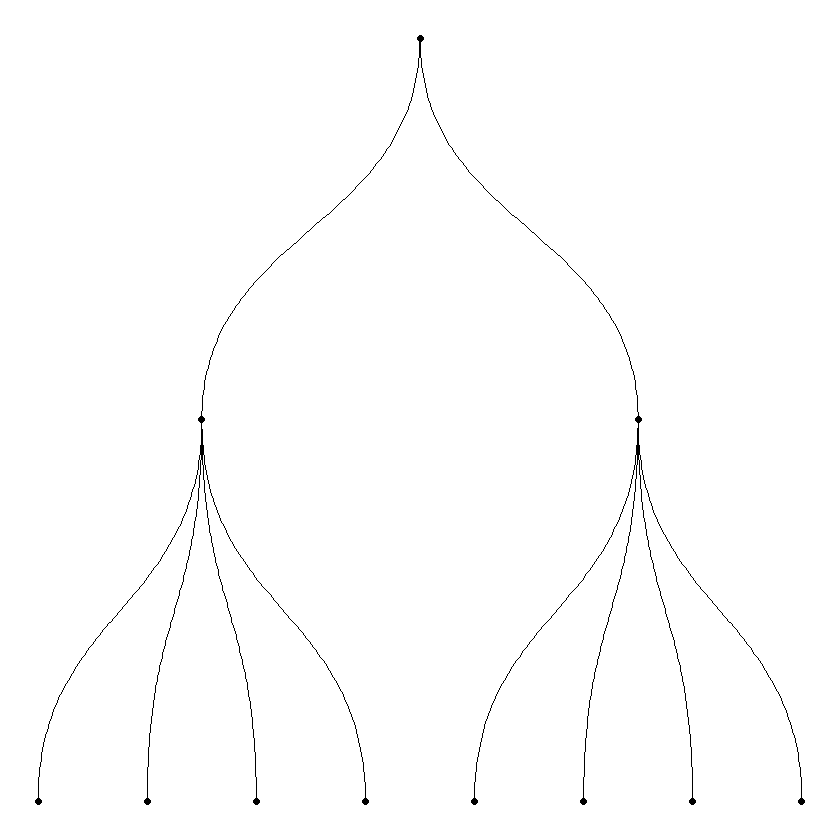

In [41]:
# Now we can plot that
mygraph<- graph_from_data_frame( edge_list )
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
    geom_edge_diagonal() +
    geom_node_point() +
    theme_void()

## 1.2 使用R和ggraph自定义树形图 Dendrogram customization with R and ggraph
本节旨在显示了如何自定义树形图：布局，边线样式，节点特征等

### 1.2.1 数据准备 Data preparation
这里准备的是本节所用到的通用数据

**首先使用igraph包创建一个数据集和一个图形对象**

In [42]:
# Libraries
library(ggraph)
library(igraph)
library(tidyverse)
theme_set(theme_void())
 
# data: edge list
# 边数据
d1 <- data.frame(from="origin", to=paste("group", seq(1,7), sep=""))
d2 <- data.frame(from=rep(d1$to, each=7), to=paste("subgroup", seq(1,49), sep="_"))
edges <- rbind(d1, d2)

Warning message:
"New theme missing the following elements: axis.title.x, axis.title.x.top, axis.title.y, axis.title.y.right, axis.text.x, axis.text.x.top, axis.text.y, axis.text.y.right, axis.ticks, axis.line, axis.line.x, axis.line.y, legend.background, legend.margin, legend.spacing, legend.spacing.x, legend.spacing.y, legend.key, legend.key.height, legend.key.width, legend.text.align, legend.title.align, legend.direction, legend.justification, legend.box.margin, legend.box.background, legend.box.spacing, panel.background, panel.border, panel.spacing.x, panel.spacing.y, panel.grid, panel.grid.minor, plot.background, strip.background, strip.placement, strip.text.x, strip.text.y"


**为每个节点添加聚类信息和值信息**

In [43]:
# We can add a second data frame with information for each node!
# 为每个节点设置信息
name <- unique(c(as.character(edges$from), as.character(edges$to)))
# 设置每个节点对应的聚类信息和值
vertices <- data.frame(
  name=name,
  group=c( rep(NA,8) ,  rep( paste("group", seq(1,7), sep=""), each=7)),
  cluster=sample(letters[1:4], length(name), replace=T),
  value=sample(seq(10,30), length(name), replace=T)
)
vertices[0:10,]
# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices)

name,group,cluster,value
<fct>,<fct>,<fct>,<int>
origin,NA,b,11
group1,NA,c,25
group2,NA,c,10
group3,NA,d,28
group4,NA,b,25
group5,NA,d,25
group6,NA,c,26
group7,NA,b,30
subgroup_1,group1,a,10


### 1.2.2 环形或线形布局 Circular or linear layout
首先，由于ggraph的layout参数，您可以使用circular选项来使用环形或线形布局。



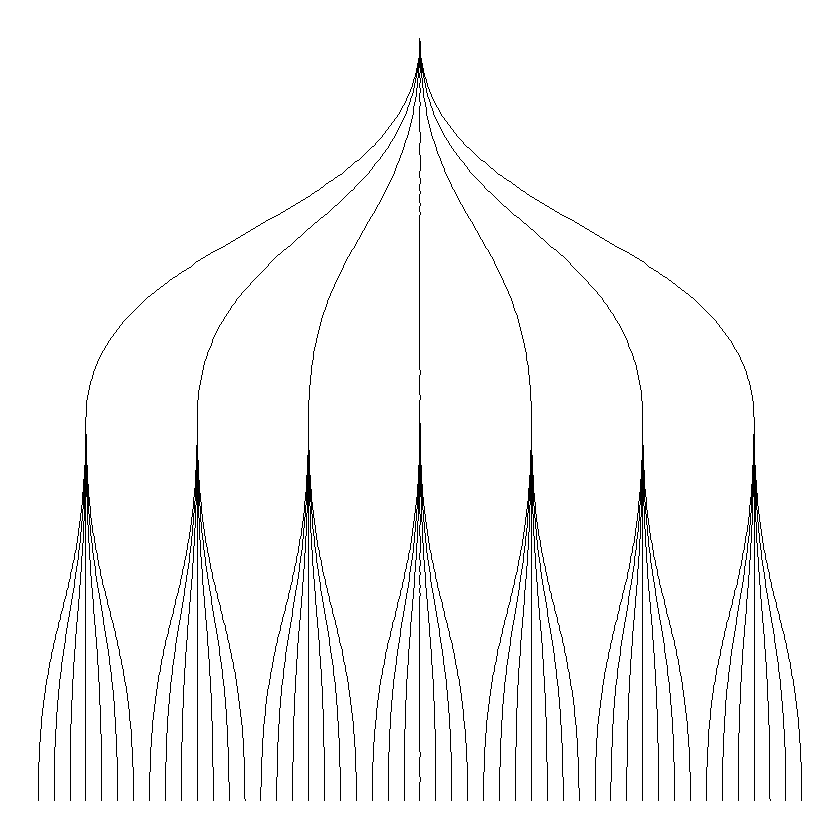

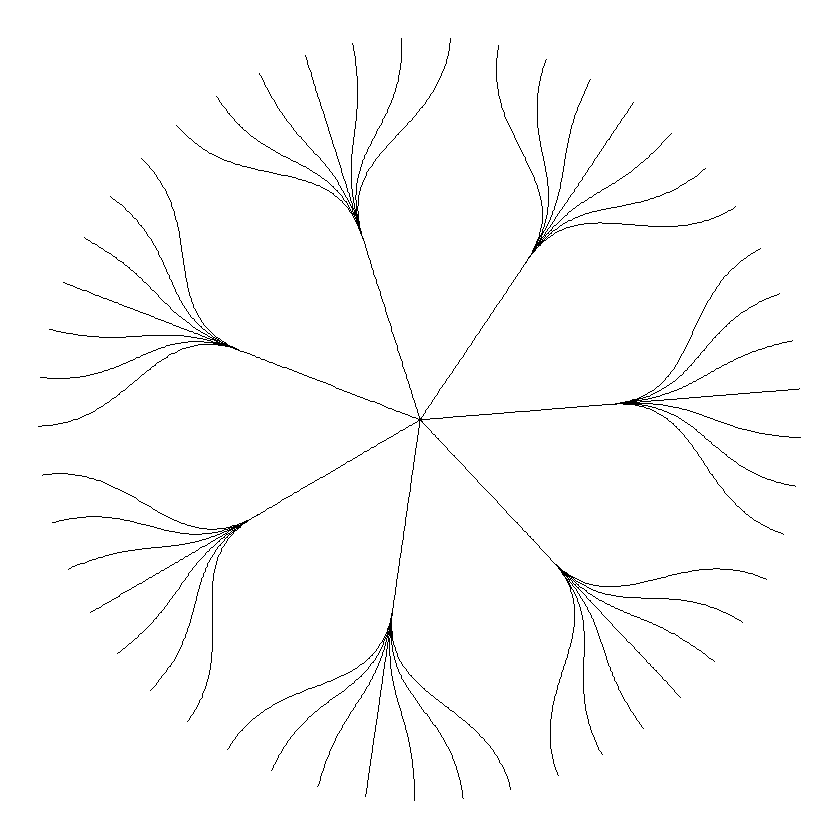

In [44]:
# 线形布局
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  geom_edge_diagonal() 
# 环形布局
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal()

### 1.2.3 边的样式 Edge style
然后你可以选择不同的边样式。ggraph软件包有两个主要功能：geom_edge_link和geom_edge_diagram。

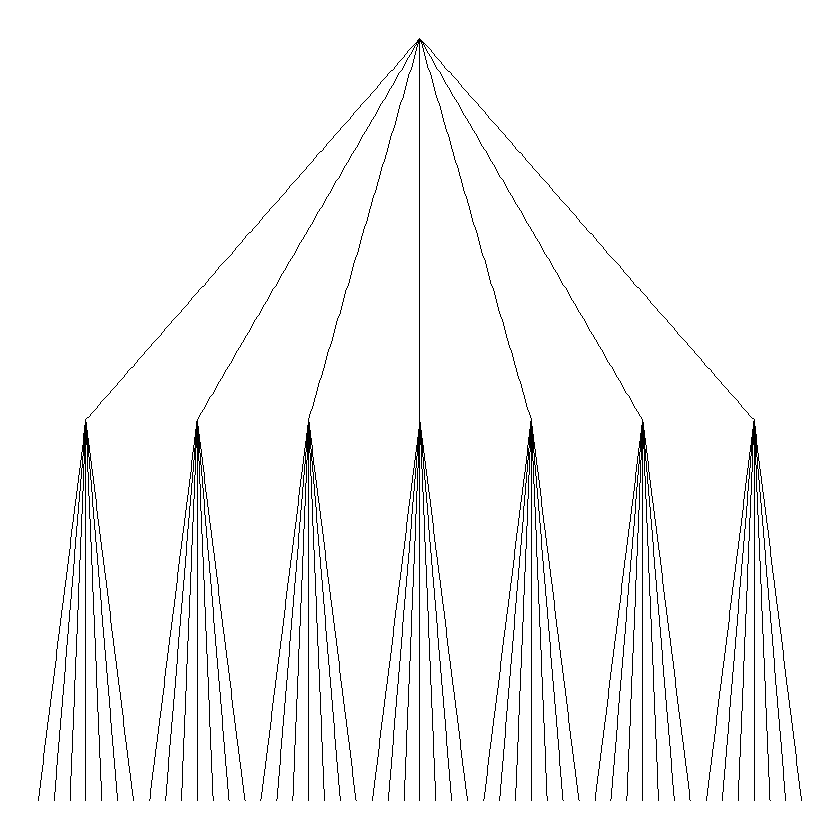

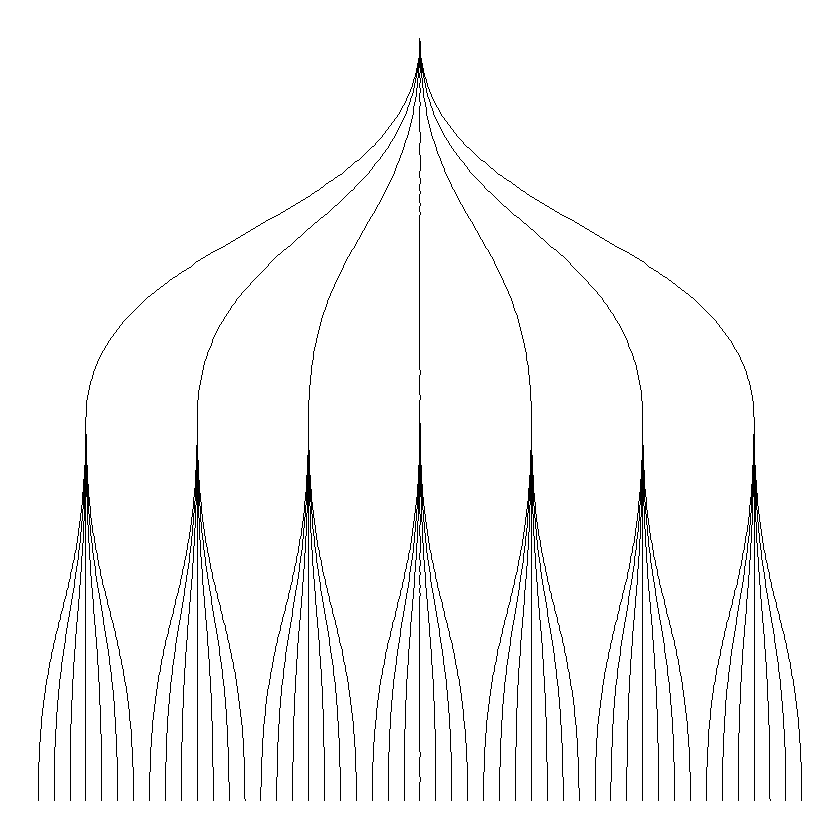

In [45]:
# 折线
ggraph(mygraph, layout = 'dendrogram') + 
  geom_edge_link()
# 弧线
ggraph(mygraph, layout = 'dendrogram') + 
  geom_edge_diagonal()

### 1.2.4 标签和节点 Labels and Nodes
您可能需要添加标签，以便对树有更深入的了解。最后是节点。这可以分别使用geom_node_text和geom_node_point来完成。但是对于环形树添加标签比较麻烦，下一节单独进行讲述。

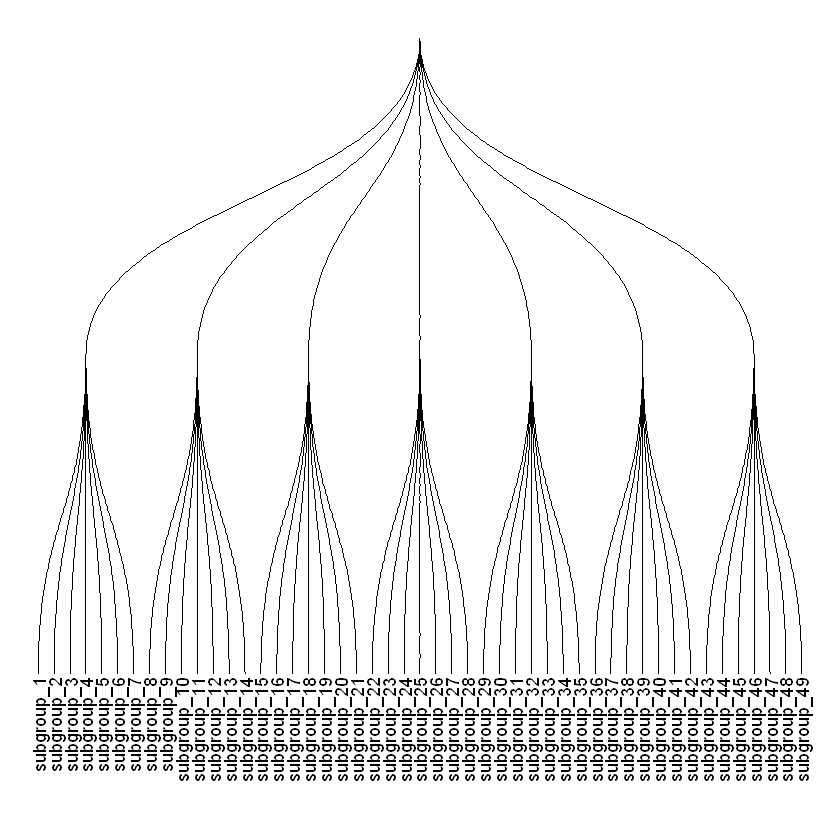

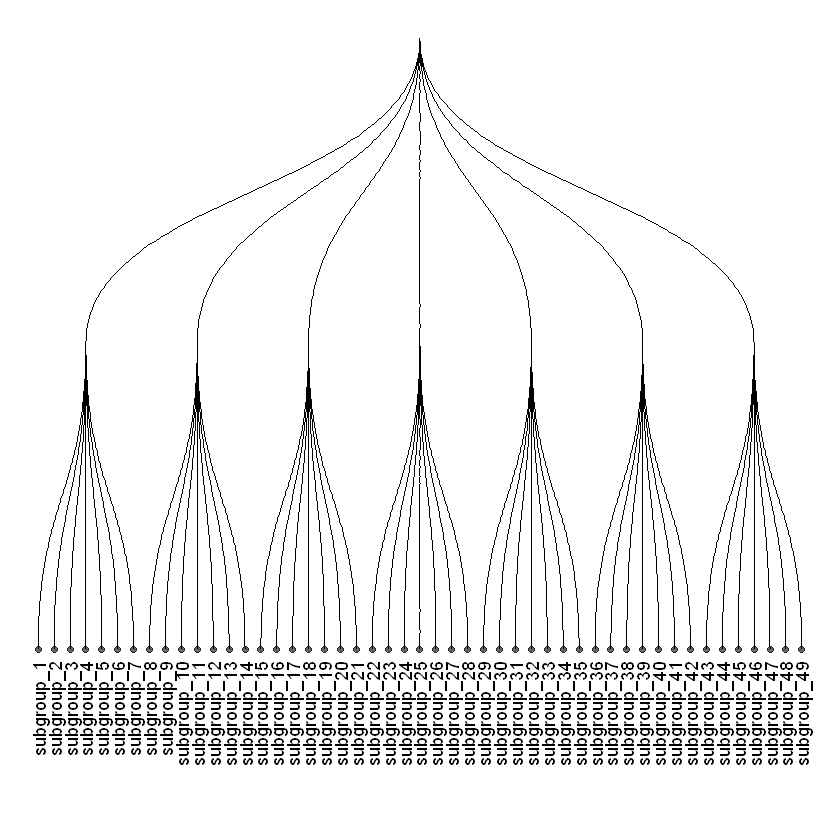

In [46]:
ggraph(mygraph, layout = 'dendrogram') + 
    # 设置边
    geom_edge_diagonal() +
    # 设置节点名，label表示节点名，filter=leaf表示跳过叶子节点，angle标签方向，hjust和nudge_y标签和节点距离
    geom_node_text(aes( label=name, filter=leaf) , angle=90 , hjust=1, nudge_y = -0.01) +
    # 设置y轴范围
    ylim(-.4, NA)

ggraph(mygraph, layout = 'dendrogram') + 
    geom_edge_diagonal() +
    geom_node_text(aes( label=name, filter=leaf) , angle=90 , hjust=1, nudge_y = -0.04) +
    # 为每个节点添加点
    geom_node_point(aes(filter=leaf) , alpha=0.6) +
    ylim(-.5, NA)

### 1.2.5 自定义美学 Customize aesthetics
在树形图中添加颜色或形状是一项常见的任务。它可以更清楚地显示数据集的组织结构。ggraph的工作原理与ggplot2相同。在每个组件的美学部分，可以使用初始数据帧的一列映射到形状、颜色、大小或其他。

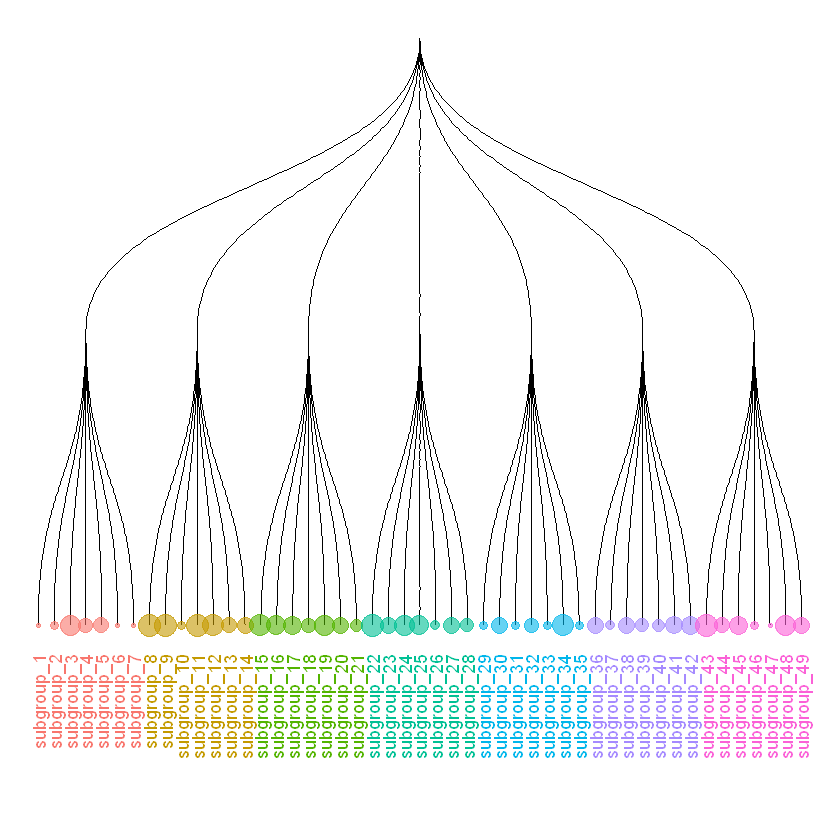

In [47]:
ggraph(mygraph, layout = 'dendrogram') + 
    geom_edge_diagonal() +
    geom_node_text(aes( label=name, filter=leaf, color=group) , angle=90 , hjust=1, nudge_y=-0.1) +
    geom_node_point(aes(filter=leaf, size=value, color=group) , alpha=0.6) +
    ylim(-.6, NA) +
    theme(legend.position="none")

## 1.3 基于R和ggraph自定义环形树形图
本节介绍通过R和ggraph自定义环形树形图。ggraph库的圆形树形图应有其专用页面，因为调整标签可能有些棘手。实际上，它们需要具有良好的角度，可以在图表的左侧上下翻转，并且还需要调整其对齐方式。以下分布介绍：

**创建数据**

In [48]:
# Libraries
library(ggraph)
library(igraph)
library(tidyverse)
library(RColorBrewer) 

# 创建数据，类似前面的步骤
# create a data frame giving the hierarchical structure of your individuals
d1=data.frame(from="origin", to=paste("group", seq(1,5), sep=""))
d2=data.frame(from=rep(d1$to, each=5), to=paste("subgroup", seq(1,25), sep="_"))
edges=rbind(d1, d2)

In [49]:
# create a vertices data.frame. One line per object of our hierarchy
# 为每个节点添加值
vertices = data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))),
  # 正态分布随机取值,共获得31个值。如果是其他数据，去掉value = runif(31)，查看运行后的dim(vertices)就知道该填多少了
  value = runif(31)
) 
# Let's add a column with the group of each name. It will be useful later to color points
# 为每个节点添加分组信息
vertices$group = edges$from[ match( vertices$name, edges$to ) ]
dim(vertices)
head(vertices)

[1] 31  3

name,value,group
<fct>,<dbl>,<fct>
origin,0.2694659,NA
group1,0.6816846,origin
group2,0.2849697,origin
group3,0.2955677,origin
group4,0.6879641,origin
group5,0.2655517,origin


**添加绘图信息**

In [50]:
# Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip calculate the ANGLE of the labels
# 让我们添加有关我们将要添加的标签的信息：角度、水平调整和翻转，计算标签的角度
# 添加id值
vertices$id=NA
myleaves=which(is.na( match(vertices$name, edges$from) ))
nleaves=length(myleaves)
vertices$id[ myleaves ] = seq(1:nleaves)
# 添加角度
vertices$angle= -360 * vertices$id / nleaves
vertices

name,value,group,id,angle
<fct>,<dbl>,<fct>,<int>,<dbl>
origin,0.26946595,NA,NA,NA
group1,0.68168456,origin,NA,NA
group2,0.28496969,origin,NA,NA
group3,0.29556769,origin,NA,NA
group4,0.68796411,origin,NA,NA
group5,0.26555169,origin,NA,NA
subgroup_1,0.13447919,group1,1,-14.4
subgroup_2,0.87993752,group1,2,-28.8
subgroup_3,0.73281460,group1,3,-43.2


In [51]:
# calculate the alignment of labels: right or left
# 判断标签是偏向左边还是右边
# hjust表示是否水平翻转
vertices$hjust<-ifelse(vertices$angle < -90 & vertices$angle > -270, 1, 0)
 
# flip angle BY to make them readable
# 是否翻转标签
vertices$angle<-ifelse(vertices$angle < -90 & vertices$angle > -270, vertices$angle+180, vertices$angle)
vertices[12:20,]
# Create a graph object
# 创建图
mygraph <- graph_from_data_frame( edges, vertices=vertices )

,name,value,group,id,angle,hjust
,<fct>,<dbl>,<fct>,<int>,<dbl>,<dbl>
12,subgroup_6,0.6796853,group2,6,-86.4,0
13,subgroup_7,0.6090466,group2,7,79.2,1
14,subgroup_8,0.9110715,group2,8,64.8,1
15,subgroup_9,0.5634806,group2,9,50.4,1
16,subgroup_10,0.7823179,group2,10,36.0,1
17,subgroup_11,0.3983178,group3,11,21.6,1
18,subgroup_12,0.3933066,group3,12,7.2,1
19,subgroup_13,0.5747933,group3,13,-7.2,1
20,subgroup_14,0.6154398,group3,14,-21.6,1


In [52]:
vertices

name,value,group,id,angle,hjust
<fct>,<dbl>,<fct>,<int>,<dbl>,<dbl>
origin,0.26946595,NA,NA,NA,NA
group1,0.68168456,origin,NA,NA,NA
group2,0.28496969,origin,NA,NA,NA
group3,0.29556769,origin,NA,NA,NA
group4,0.68796411,origin,NA,NA,NA
group5,0.26555169,origin,NA,NA,NA
subgroup_1,0.13447919,group1,1,-14.4,0
subgroup_2,0.87993752,group1,2,-28.8,0
subgroup_3,0.73281460,group1,3,-43.2,0


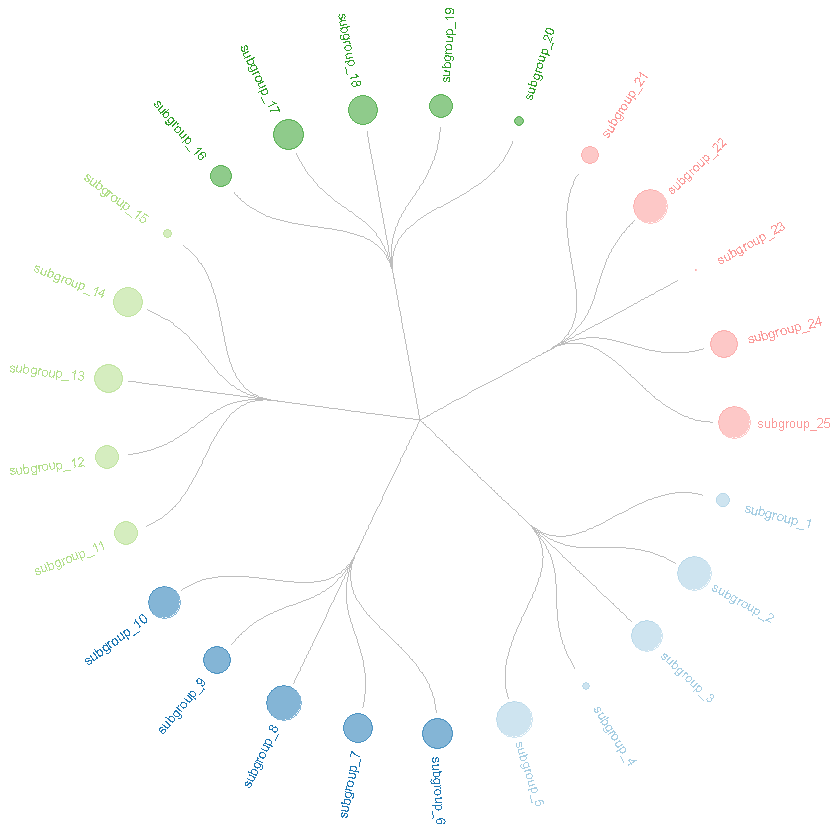

In [53]:
# Make the plot
p<-ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
    # 设置边
    geom_edge_diagonal(colour="grey") +
    # 设置边的颜色
    scale_edge_colour_distiller(palette = "RdPu") +
    # 设置点的标签
    geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=2.7, alpha=1) +
    # 设置点的形状
    geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=value, alpha=0.2)) +
    # 控制颜色
    scale_colour_manual(values= rep( brewer.pal(9,"Paired") , 30)) +
    scale_size_continuous( range = c(0.1,10) ) +
    theme_void() +
    theme( 
        # 不显示图例
        legend.position="none",
        plot.margin=unit(c(0,0,0,0),"cm"),
    ) +
    expand_limits(x = c(-1.3, 1.3), y = c(-1.3, 1.3))
p
# 保存数据 Save at png
ggsave(p, file="output.png", width=10, height=10,dpi=300)

另外对于标签角度的设置多说几句，不同的平台标签角度设置不一样。标签的角度设置主要有以下三行代码：
```
# 添加角度
vertices$angle= -360 * vertices$id / nleaves
# hjust表示是否水平翻转
vertices$hjust<-ifelse(vertices$angle < -90 & vertices$angle > -270, 1, 0)
# 是否翻转标签
vertices$angle<-ifelse(vertices$angle < -90 & vertices$angle > -270, vertices$angle+180, vertices$angle)
```

第一行代码指的是给每个标签赋予一个角度值，通常设置这一行，其他两行不设置，或者跳过，图形基本上就会完成。只不过在环形左半边标签是翻转的，就是字朝下。如果要字朝上就设置先水平反正左边的标签，然后180度旋转左边的标签，右边标签不变就行了。

比如通过第一行我们获得的角度值，subgroup_7到subgroup_18处于左半边，角度其实范围为-90到-270度，所以通过第二行和第三行代码只要设置-90度到-270度的点，水平翻转然后翻转标签就行了。

# 2 聚类结果的树形图 DENDROGRAM FROM CLUSTERING RESULT.
层次聚类是数据科学中的一项常见任务，可以使用R中的hclust()函数来执行。下面的示例将指导您完成整个过程，演示如何准备数据、如何运行聚类以及如何构建适当的图表以可视化其结果。

## 2.1 用R进行聚类的最基本树形图 Most basic dendrogram for clustering with R
聚类允许通过相似性将样本分组，并且其结果可以可视化为树形图。这篇文章描述了该hclust()函数的基本用法，并根据其输出构建树形图。对于层次聚类树形图有以下极大要素：
+ 输入数据集是一个矩阵，其中每一行是一个样本，每一列是一个变量。可以使用t()函数转置矩阵。
+ 聚类是在提供样本之间距离的正方形矩阵（sample x sample）上执行的，距离矩阵可以使用dist()或cor()函数计算，具体取决于您提出的问题
+ hclust()函数用于执行分层聚类
+ 它的输出可以用plot()函数直接可视化。请参阅可能的自定义。

**首先产生数据集**

In [54]:
# Dataset 
data <- matrix( sample(seq(1,2000),200), ncol = 10 )
rownames(data) <- paste0("sample_" , seq(1,20))
colnames(data) <- paste0("variable",seq(1,10))
data
dim(data)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10
sample_1,49,863,888,361,1285,1695,258,821,459,1715
sample_2,251,673,1096,963,1874,1837,876,1329,1565,1286
sample_3,156,220,73,726,1356,1951,108,751,1218,823
sample_4,1241,363,367,1097,847,275,1415,582,646,711
sample_5,533,1006,440,1962,510,70,732,5,584,899
sample_6,1443,1758,204,1216,1248,307,1072,1975,719,1776
sample_7,412,8,1983,665,197,1347,612,656,557,186
sample_8,1856,1850,548,957,150,296,405,1340,1088,672
sample_9,994,1171,233,1656,1732,953,1651,918,60,1676
sample_10,715,272,368,670,688,1743,724,1956,897,1974


[1] 20 10

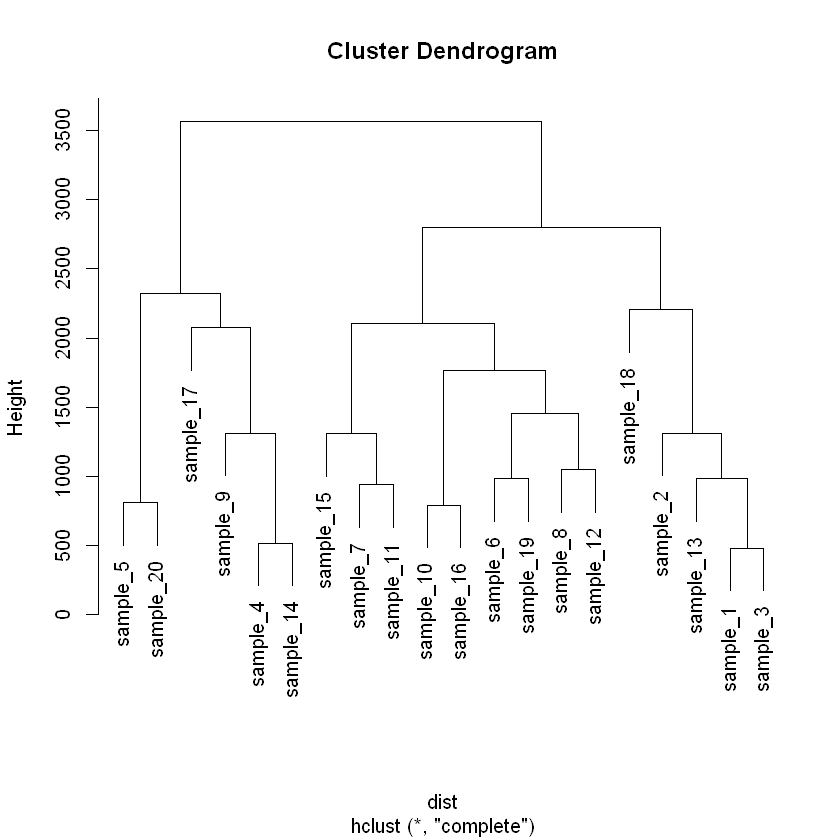

In [55]:
# Euclidean distance
# 计算欧式距离
dist <- dist(data[ , c(4:8)] , diag=TRUE)

# Hierarchical Clustering with hclust
# 分层聚类
hc <- hclust(dist)

# Plot the result
plot(hc)

对于层次聚类主要有以下几个原则：
+ 基于目标之间的距离。
+ 寻找两个目标之间的最小距离。
+ 将两个目标对象聚合在一个簇中。
+ 用目标群的中心进行计算。直到只有一个簇包含每个点。

## 2.2 放大分支 Zoom on a group
我们可以放大树的特定部分。使用[[ ]]运算符选择感兴趣的枝条。例如：
```
# 将上面的树形图存入dhc
dhc <- as.dendrogram(hc)
dhc[[1]] 表示从上到下第一层，其中从左往右第一个枝条
dhc[[2]][[2]] 表示从上到下第二层，其中从左往右第二个枝条
```

下面代码，所示展示2.1节所画层次树第一层右边部分分支

'dendrogram' with 2 branches and 14 members total, at height 2795.492 


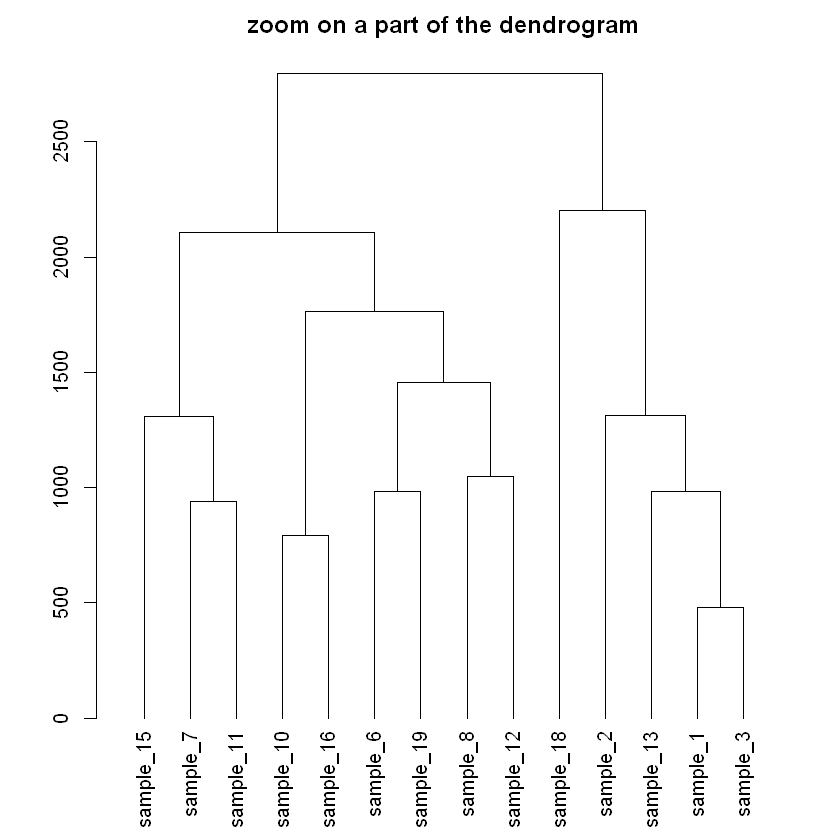

In [56]:
# store the dedrogram in an object
# 保存聚类结果为dhc变量
dhc <- as.dendrogram(hc)

# set the margin
par(mar=c(4,4,2,2))
# 打印会告诉你分支情况
print(dhc[[2]])
# Plot the Second group
# 绘图
plot(dhc[[2]] , main= "zoom on a part of the dendrogram")

下面代码，所示展示2.1节所画层次树第一层右边部分的第二个分支

'dendrogram' with 2 branches and 9 members total, at height 2107.407 


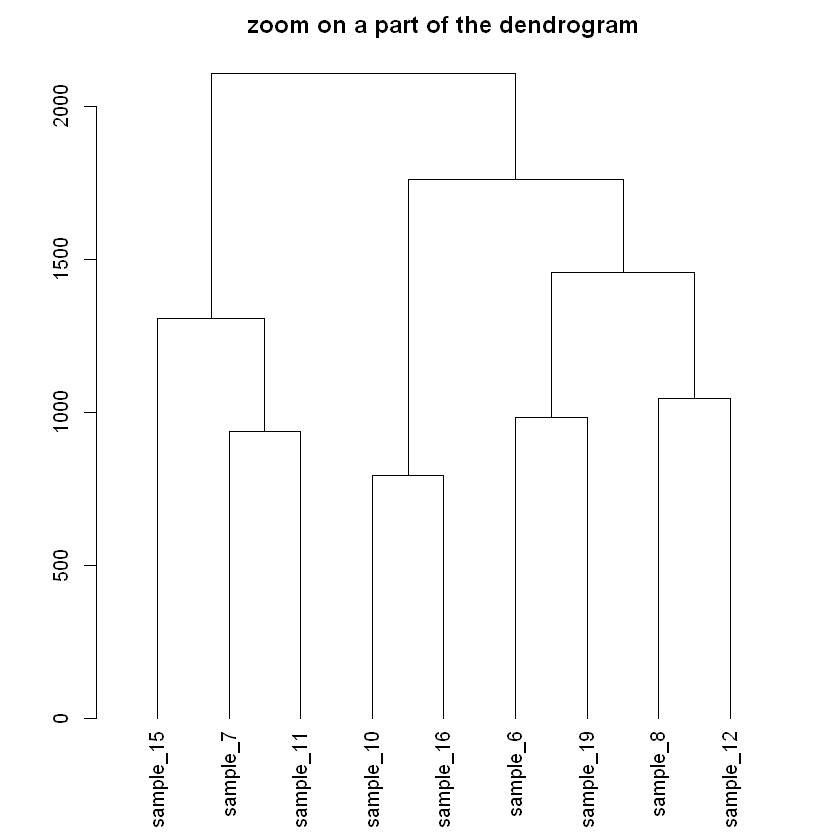

In [57]:
# store the dedrogram in an object
dhc <- as.dendrogram(hc)

# set the margin
par(mar=c(4,4,2,2))

print(dhc[[2]][[1]])
# Plot the Second group
plot(dhc[[2]][[1]] , main= "zoom on a part of the dendrogram")

## 2.3 绘制带颜色和图例的树形图 Dendrogram with color and legend in R
本节主要讲述基本树状图的自定义。展示了如何为叶子和样本名称添加特定的颜色。它允许检查在聚类之后是否确实找到了预期的类。

**首先生成数据**

In [58]:
# Build dataset (just copy and paste, this is NOT interesting)
# 生成数据，可以跳过
sample <- paste(rep("sample_",24) , seq(1,24) , sep="")
specie <- c(rep("dicoccoides" , 8) , rep("dicoccum" , 8) , rep("durum" , 8))
treatment <- rep(c(rep("High",4 ) , rep("Low",4)),3)
data <- data.frame(sample,specie,treatment)
for (i in seq(1:5)){
      gene=sample(c(1:40) , 24 )
      data=cbind(data , gene)
      colnames(data)[ncol(data)]=paste("gene_",i,sep="")
     }
data[data$treatment=="High" , c(4:8)]=data[data$treatment=="High" , c(4:8)]+100
data[data$specie=="durum" , c(4:8)]=data[data$specie=="durum" , c(4:8)]-30
rownames(data) <- data[,1]    
head(data)

,sample,specie,treatment,gene_1,gene_2,gene_3,gene_4,gene_5
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_1,sample_1,dicoccoides,High,126,133,110,111,135
sample_2,sample_2,dicoccoides,High,130,130,111,121,113
sample_3,sample_3,dicoccoides,High,124,135,115,125,140
sample_4,sample_4,dicoccoides,High,111,109,135,135,132
sample_5,sample_5,dicoccoides,Low,20,34,9,17,37
sample_6,sample_6,dicoccoides,Low,32,26,21,1,24


**然后聚类**

In [59]:
# Compute Euclidean distance between samples
dist=dist(data[ , c(4:8)] , diag=TRUE)

# Perfor clustering with hclust
# 聚类并保存结果
hc <- hclust(dist)
dhc <- as.dendrogram(hc)
dhc

'dendrogram' with 2 branches and 24 members total, at height 328.8632 

对于每个节点都有自己的属性

In [60]:
# Actually, each leaf of the tree has several attributes, like the color, the shape.. Have a look to it: 
# 选择特别的节点
specific_leaf <- dhc[[1]][[1]][[1]]
specific_leaf
attributes(specific_leaf)

'dendrogram' with 2 branches and 2 members total, at height 23.81176 

$members
[1] 2

$midpoint
[1] 0.5

$height
[1] 23.81176

$class
[1] "dendrogram"

**创建改变叶子节点属性函数**

如果想给树的每片叶子上色，必须改变每片叶子的属性。这可以使用dendrapply函数来完成。因此，创建了一个函数，向叶子节点添加属性。如果应用自己的数据，改变treatment和specie的值就行了。

In [61]:
i=0
colLab<-function(n)
{
    # 判断是否为节点
    if(is.leaf(n))
    {
        # 获得节点的属性
        a=attributes(n)
        
        # I deduce the line in the original data, and so the treatment and the specie.
        # 获得该点的信息
        ligne=match(attributes(n)$label,data[,1])
        # 根据自己的结果设置
        treatment=data[ligne,3];
            if(treatment=="Low"){col_treatment="blue"};if(treatment=="High"){col_treatment="red"}
        # 根据种类设置颜色，根据自己的结果设置
        specie=data[ligne,2];
            if(specie=="dicoccoides"){col_specie="red"};if(specie=="dicoccum"){col_specie="Darkgreen"};if(specie=="durum"){col_specie="blue"}
        
        # M odification of leaf attribute
        # 修改节点的属性
        attr(n,"nodePar")<-c(a$nodePar,list(cex=1.5,lab.cex=1,pch=20,col=col_treatment,lab.col=col_specie,lab.font=1,lab.cex=1))
        }
    return(n)
}

**绘图**

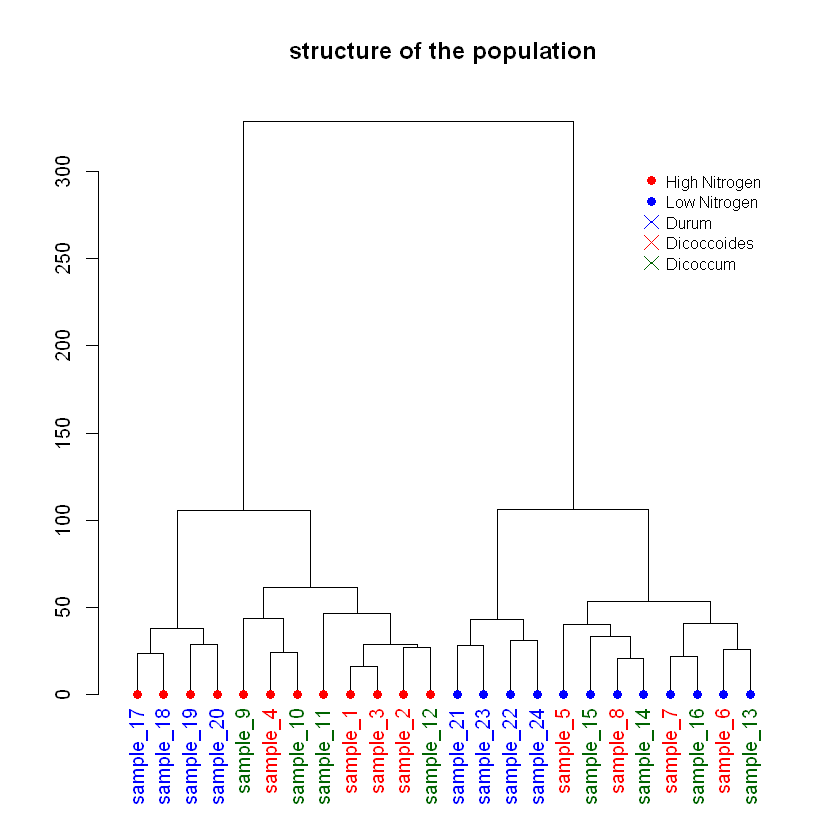

In [62]:
# 应用函数
dL <- dendrapply(dhc, colLab)
 
# And the plot
plot(dL , main="structure of the population")
# 图例
legend("topright",
     # 文字
     legend = c("High Nitrogen" , "Low Nitrogen" , "Durum" , "Dicoccoides" , "Dicoccum"), 
     # 颜色
     col = c("red", "blue" , "blue" , "red" , "Darkgreen"), 
     pch = c(20,20,4,4,4), bty = "n",  pt.cex = 1.5, cex = 0.8 , 
     text.col = "black", horiz = FALSE, inset = c(0, 0.1))

# 3 使用DENDEXTEND绘制树形图 MORE CUSTOMIZATION WITH DENDEXTEND
dendextend主要是自定义层次聚类图，对第二节的补充。dendextend包允许在树状图定制方面更进一步。这里有一组例子展示了主要的可能性，比如在底部添加颜色条，面对面绘制2棵树等等。

## 3.1 基础树形图绘制 Basic dendrogram
DENDEXTEND首先需要绘制如下最基本的树形图，然后进行相应更改

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


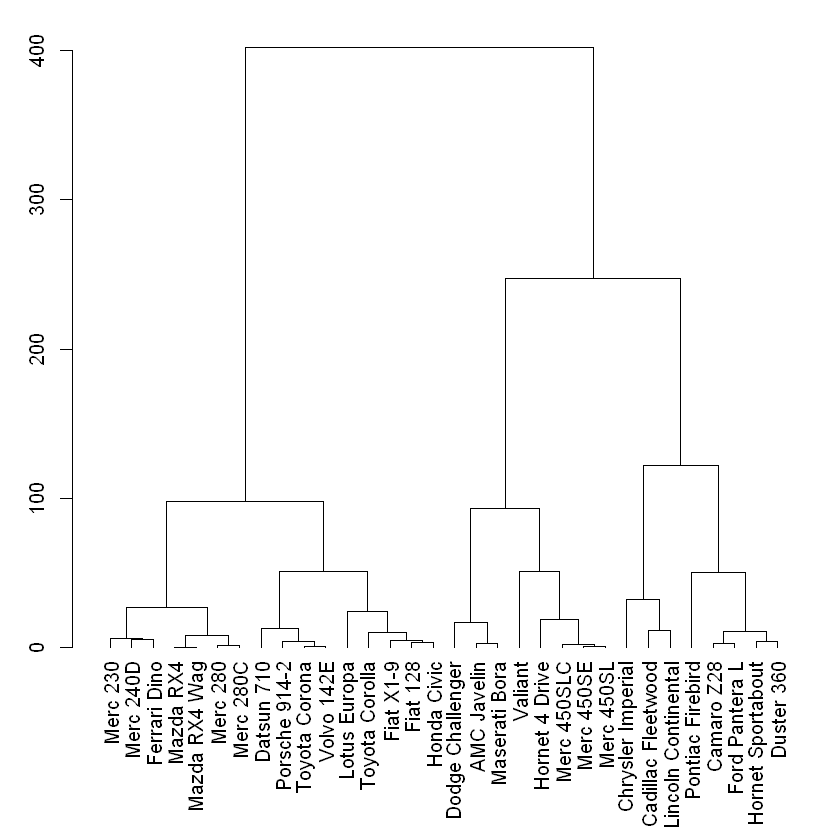

In [63]:
# Library
library(tidyverse)
 
# Data
head(mtcars)
 
# Clusterisation using 3 variables
# 聚类，使用管道
mtcars %>% 
  select(mpg, cyl, disp) %>% 
  dist() %>% 
  hclust() %>% 
  as.dendrogram() -> dend
 
# Plot
# 绘图
par(mar=c(7,3,1,1))  # Increase bottom margin to have the complete label
plot(dend)

## 3.2 set函数 The set() function
dendextend的set()函数允许修改树的特定部分的属性。例如，您可以为分支和标签自定义cex、lwd、col、lty。也可以自定义节点或叶。下面的代码说明了这一概念：

**自定义树枝和标签**

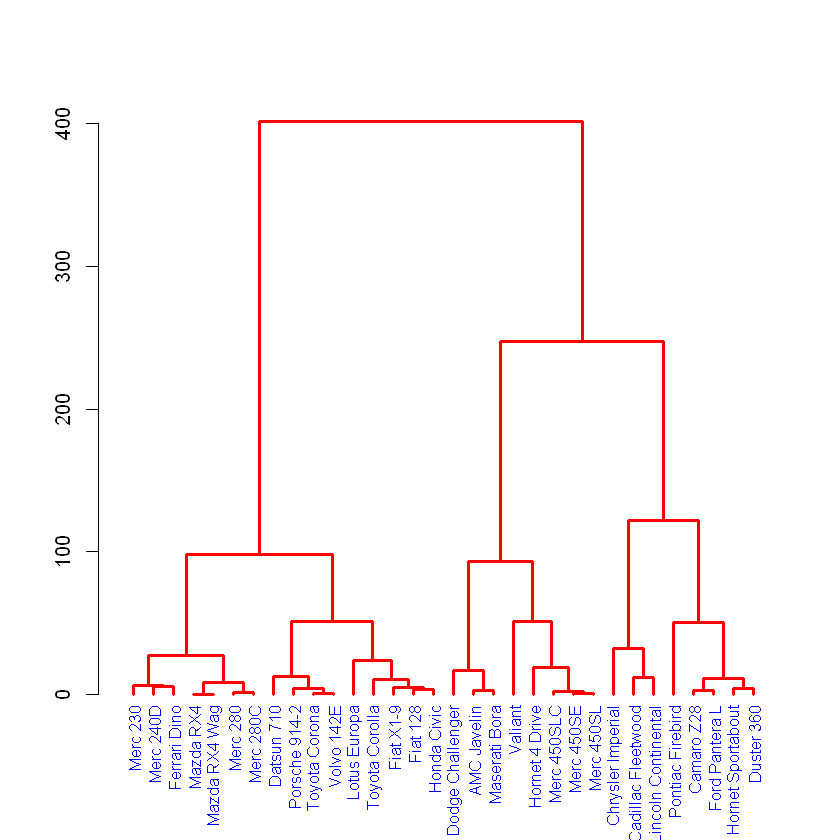

In [64]:
# library
library(dendextend)

# 绘图dend是设置函数
dend %>% 
    # Custom branches
    # 自定义树枝的颜色
    set("branches_col", "red") %>% 
    # 自定义树枝宽度
    set("branches_lwd", 3) %>%
    # Custom labels
    # 自定义标签颜色
    set("labels_col", "blue") %>% 
    # 自定义标签字体大小
    set("labels_cex", 0.8) %>%
    plot()

**自定义树枝节点**

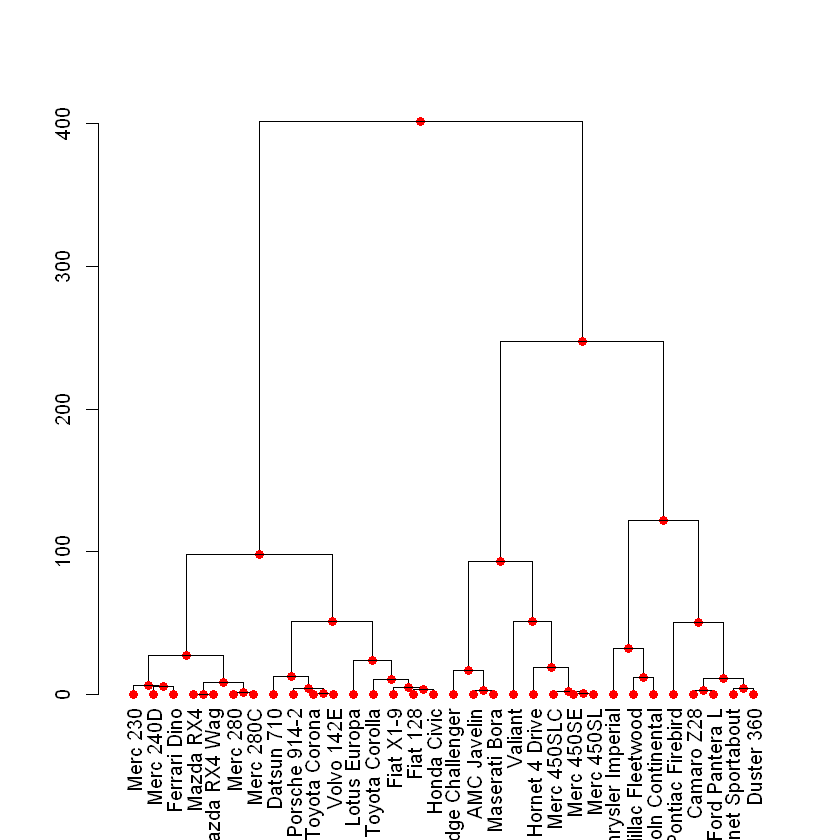

In [65]:
dend %>% 
    # 自定义树枝节点形状
    set("nodes_pch", 20)  %>% 
    # 自定义树枝节点大小
    set("nodes_cex", 1.5) %>% 
    # 自定义树枝节点颜色
    set("nodes_col", "red") %>% 
    plot()

**自定义叶子**

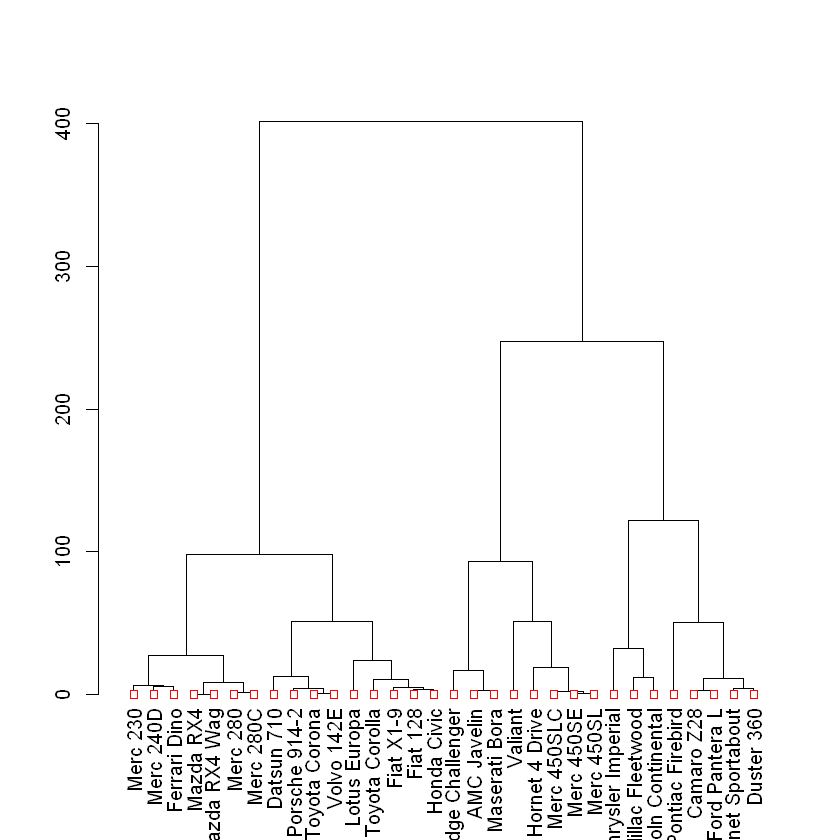

In [66]:
dend %>% 
    # 最后一层节点形状
    set("leaves_pch", 22)  %>% 
    # 最后一层节点宽度
    set("leaves_cex", 1) %>%
    # 最后一层节点颜色
    set("leaves_col", "red") %>% 
    plot()

## 3.3 聚类结果突出 Highlight clusters
dendextend库有一些很好的功能来突出树簇。可以根据分支的簇属性为分支和标签上色，指定所需的簇数。这个 rect.dendrogram()函数甚至允许用矩形突出显示一个或多个特定的簇。

**基于颜色突出聚类结果**

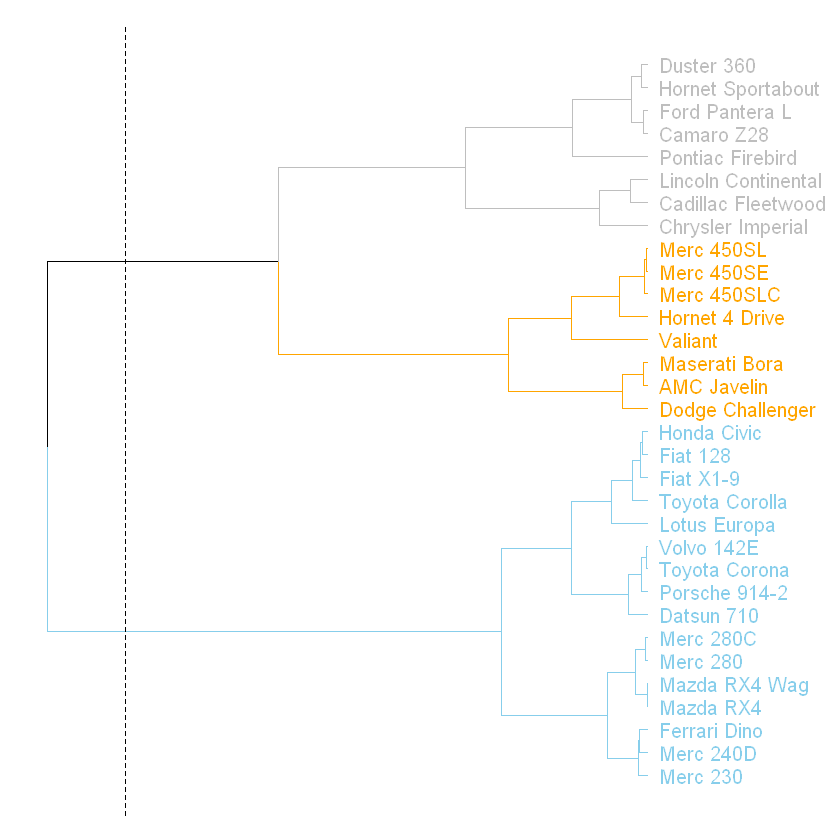

In [67]:

par(mar=c(1,1,1,7))
dend %>%
    # 根据第一层分支结果自定义标签颜色
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    # 根据第一层分支结果自定义分支颜色
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3) %>%
    # horize是否水平放置,axes是否显示旁边的距离尺
    plot(horiz=TRUE, axes=FALSE)
# 画线条，v高度，lty线条类型
abline(v = 350, lty = 2)

**基于矩形框突出聚类结果**

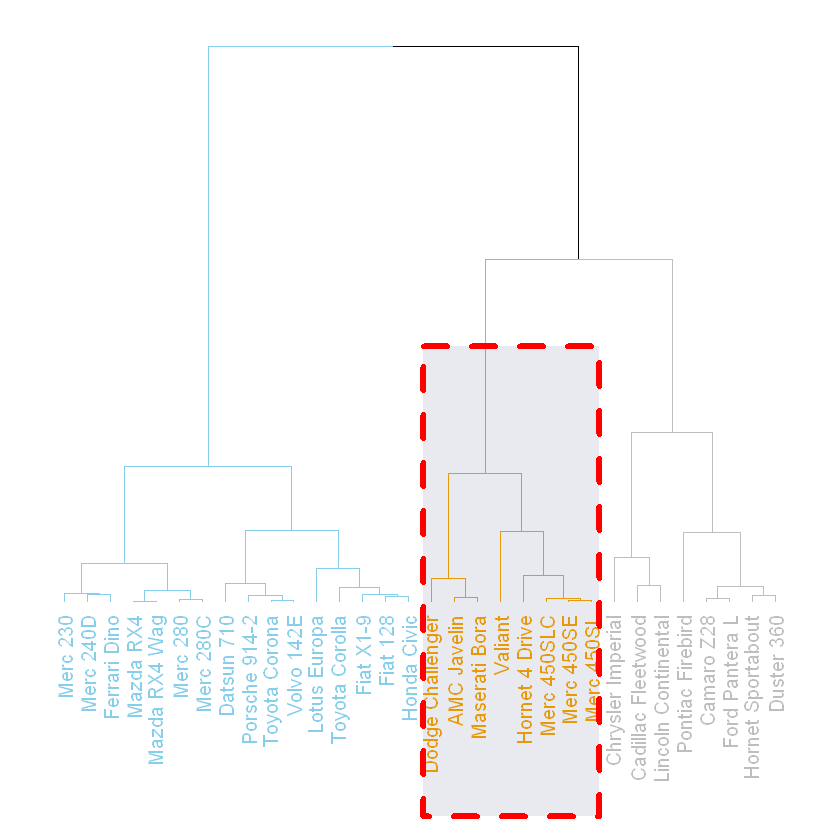

In [68]:
# 使用
par(mar=c(9,1,1,1))
dend %>%
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3) %>%
    plot(axes=FALSE)
# 画矩形框
# k表示将类切割为k个簇，lty矩形框线条类型，lwd矩形框线条宽度，col填充颜色,x表示从第几个类开始画簇
rect.dendrogram( dend, k=3, lty = 2, lwd = 5, x=17, col=rgb(0.1, 0.2, 0.4, 0.1) ) 

## 3.4 与预期的聚类结果相比较 Comparing with an expected clustering
将得到的集群与预期的分布进行比较是一项常见的任务。在我们用来构建树状图的mtcars数据集中，有一个am列是一个二进制变量。如果我们可以用cluster()函数来检查与这个变量是否一致。

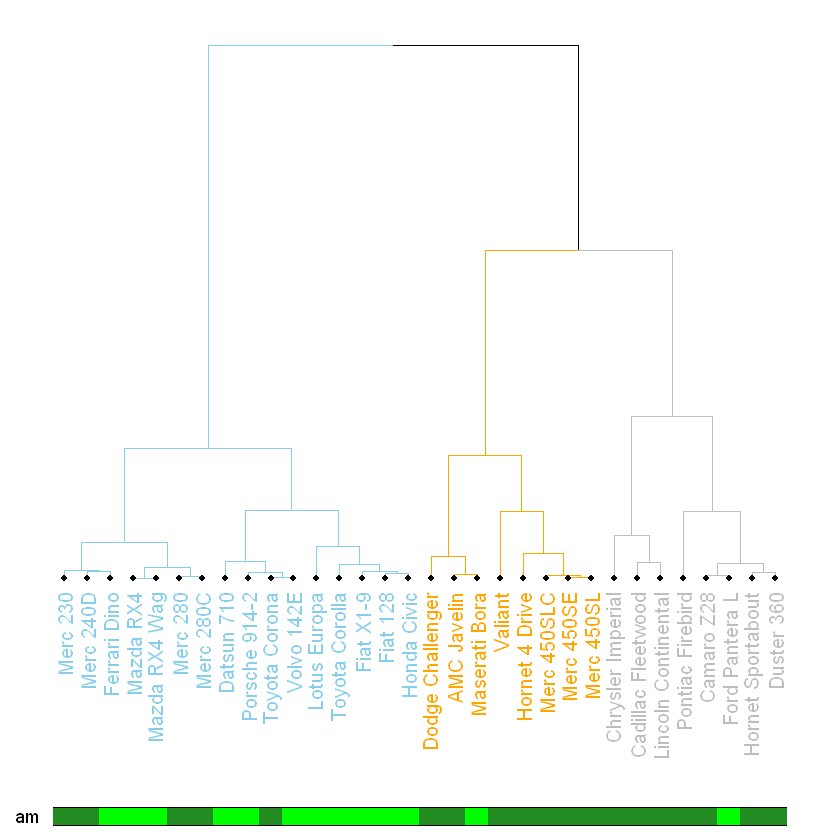

In [69]:

# Create a vector of colors, darkgreen if am is 0, green if 1.
# 获得数据，如果am为0就是forestgreen颜色
my_colors <- ifelse(mtcars$am==0, "forestgreen", "green")
 
# Make the dendrogram
# 设置图像空白区域
par(mar=c(10,1,1,1))
dend %>%
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3) %>%
    set("leaves_pch", 19)  %>% 
    set("nodes_cex", 0.7) %>% 
    plot(axes=FALSE,horiz =FALSE)
 
# Add the colored bar
# 添加颜色bar
# colors颜色，dend聚类图，rowLabels名字
colored_bars(colors = my_colors, dend = dend, rowLabels = "am",horiz =FALSE)

## 3.5 基于tanglegram()比较2个树状图 Comparing 2 dendrograms with tanglegram()
可以使用tanglegram()函数比较两个树状图。这里它说明了一个非常重要的概念：当你计算你的距离矩阵和当你运行你的层次聚类算法时，你不能简单地使用默认选项而不考虑你在做什么。看看两种不同的集群化方法之间的区别吧。

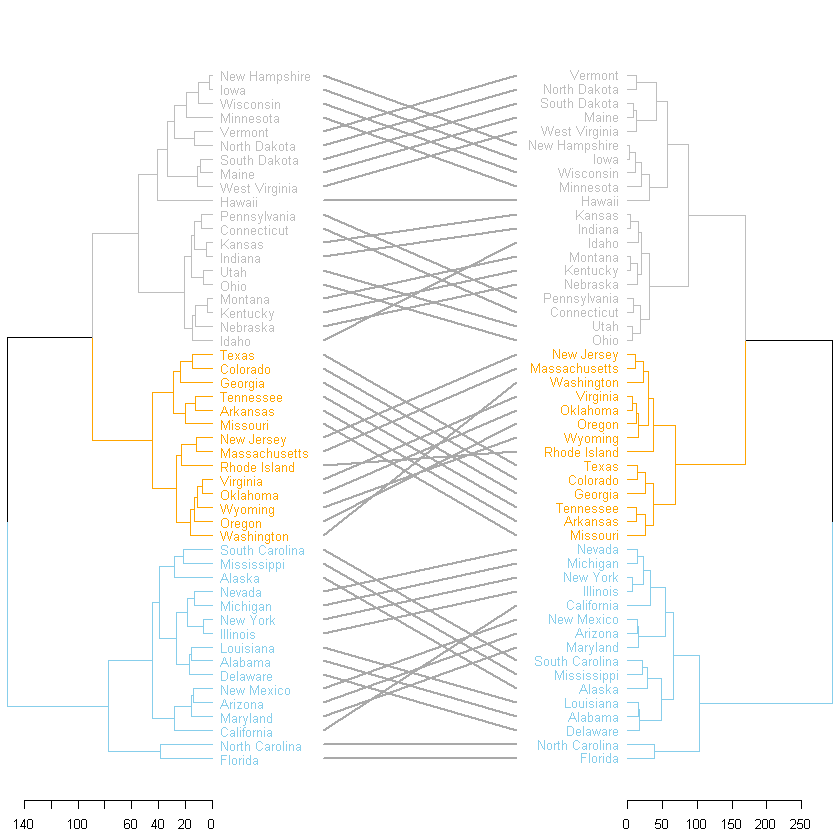

In [70]:
# Make 2 dendrograms, using 2 different clustering methods
# 使用两种完全不同的聚类方法
d1 <- USArrests %>% dist() %>% hclust( method="average" ) %>% as.dendrogram()
d2 <- USArrests %>% dist() %>% hclust( method="complete" ) %>% as.dendrogram()
 
# Custom these kendo, and place them in a list
# 定制树列表
dl <- dendlist(
  d1 %>% 
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_lty", 1) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3),
  d2 %>% 
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_lty", 1) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3)
)
 
# Plot them together
tanglegram(dl, 
            # 子树是否带颜色
            common_subtrees_color_lines = FALSE, 
            # 是否突出显示边
            highlight_distinct_edges  = TRUE, 
            # 是否突出分支
            highlight_branches_lwd=FALSE, 
            # 两个树的距离
            margin_inner=7,
            # 两个树之间线条宽度
            lwd=2
)

# 4 参考
+ [Dendrogram](https://www.r-graph-gallery.com/dendrogram.html)
+ [基于matplotlib实现树形图的绘制](https://blog.csdn.net/luohenyj/article/details/97949476)